## **Apriori Algorithm for Misinformation**

- Applying the Apriori algorithm to a misinformation dataset can reveal significant co-occurrence patterns within claims, helping identify common themes or topics. 
- The Apriori algorithm, commonly used in association rule mining, is valuable here as it helps uncover relationships among elements within a dataset by finding frequent itemsets and generating association rules based on those patterns.

### Why Use the Apriori Algorithm for Misinformation?

The Apriori algorithm is advantageous for misinformation data because it can identify patterns or topics that frequently co-occur within claims, such as terms related to "religion" and "politics" or "caste" and "violence." This insight is especially useful in misinformation analysis, where it’s essential to understand how topics are intertwined or if specific themes are repeatedly linked to misinformation claims. By finding patterns in co-occurring words or themes, the Apriori algorithm can help answer questions like:

1) What topics frequently appear together in misinformation claims?
2) Which entities, such as political parties or social groups, are commonly mentioned alongside specific topics?
3) Are certain keywords recurrently associated with particular types of misinformation (e.g., health-related misinformation with certain diseases)?

### Theoretical Background of Apriori Algorithm

The Apriori algorithm is an iterative method used to generate frequent itemsets and association rules in transactional datasets. Its main theoretical steps include:

- **Frequent Itemset Generation:** It identifies all itemsets (groups of items) that meet a minimum support threshold, which means they appear frequently in the dataset.

- **Association Rule Generation:** Using the frequent itemsets, it generates rules that suggest a strong association between items. Each rule has a confidence level that indicates the likelihood of one itemset appearing with another.

- **Pruning:** Apriori uses the downward closure property to prune the search space, ensuring that any superset of a non-frequent itemset cannot be frequent.

### Implementing Apriori Algorithm on our Dataset

In [33]:
# import libraraies
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# read the data
data = pd.read_csv('boomlive_data_cleaned.csv')

In [35]:
# few rows of the data
data.head(3)

,Category,Link,Heading,Sub_heading,Author,Date,Claim,Fact_check,Claim_summary,Claimed_by,Fact_check_summary,Links,Year,Month
0,fact check,https://www.boomlive.in/fact-check/awami-leagu...,bangladeshi actor being heckled on video false...,"according to local reports, mishti subas was c...",Archis Chowdhury,2024-10-10 14:16:00,video shows an american woman being heckled in...,boom identified the woman as bangladeshi actor...,video shows an american woman being heckled in...,social media users,false,"['https://archive.is/607Xw', 'https://www.face...",2024,10
1,fast check,https://www.boomlive.in/fast-check/morphed-pho...,morphed photo falsely shared as patanjali sell...,boom found that the viral image was morphed fr...,Yangchula Bhutia,2024-10-09 13:33:00,an image showing a beef biryani spice mix with...,boom found that the viral image claiming patan...,a viral image claims that patanjali manufactur...,facebook,false,NaN,2024,10
2,fact check,https://www.boomlive.in/fact-check/video-of-ma...,video of man killed by cousins in bangladesh f...,boom found that the deceased man's name is han...,Tausif Akbar,2024-10-08 18:36:00,video shows a hindu man killed by slitting his...,the incident happened because of personal enmi...,video shows body of a hindu man killed by slit...,"facebook users, x users",false,[],2024,10


In [36]:
# print top 5 headings, subheadings and claims
print(data['Heading'][0])
print(data['Sub_heading'][0])
print(data['Claim'][0])


bangladeshi actor being heckled on video falsely misidentified as american
according to local reports, mishti subas was cutting a cake at dhaka university to celebrate sheikh hasina's birthday, which generated resentment among the public.
video shows an american woman being heckled in bangladesh for not wearing a hijab.


In [37]:
print(data['Heading'][2])
print(data['Sub_heading'][2])
print(data['Claim'][2])

video of man killed by cousins in bangladesh falsely shared as hindu man's throat slit
boom found that the deceased man's name is hanif and he was killed because of personal enmity.
video shows a hindu man killed by slitting his throat in front of everyone at the eidgah gate of kauria para in narsingdi district of bangladesh


C:\Users\prita\AppData\Local\Temp\ipykernel_5388\2754233413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=data, palette='coolwarm')


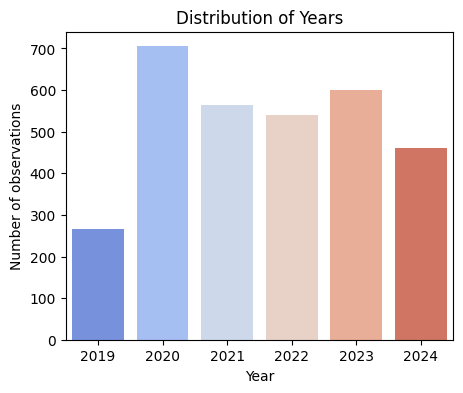

In [38]:
# histogram of the Year column using seaborn
plt.figure(figsize=(5, 4))
sns.countplot(x='Year', data=data, palette='coolwarm')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Number of observations')
plt.show()

### Lets work on only 2024 year Data first

In [39]:
# extract 2024 data
data_2024 = data[data['Year'] == 2024]

C:\Users\prita\AppData\Local\Temp\ipykernel_5388\1167946507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=data_2024, palette='coolwarm')


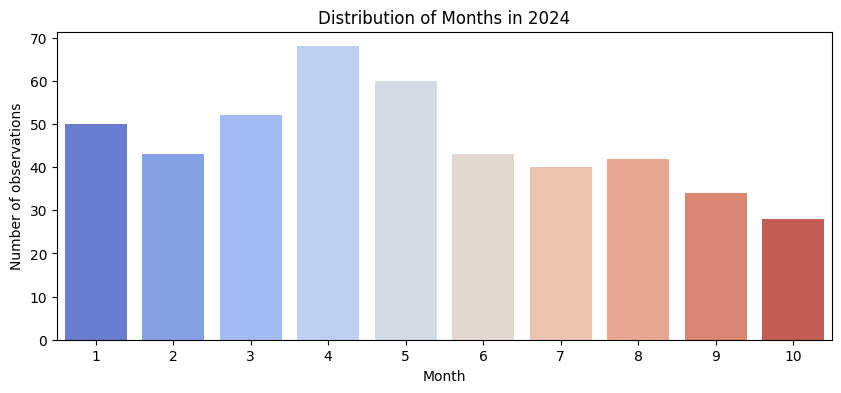

In [40]:
# histogram of the Month column using seaborn of year 2024
plt.figure(figsize=(10, 4))
sns.countplot(x='Month', data=data_2024, palette='coolwarm')
plt.title('Distribution of Months in 2024')
plt.xlabel('Month')
plt.ylabel('Number of observations')
plt.show()

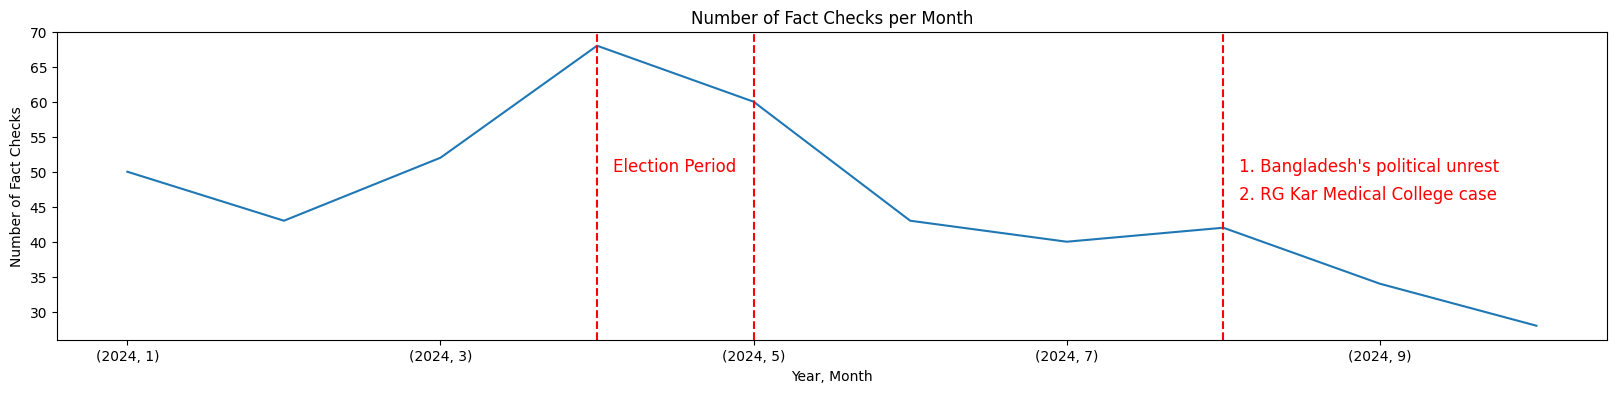

In [41]:
# indicate election phase on the above plot, the election period was from April to May 2024, so we will highlight this period by drawing a dotted box around it
plt.figure(figsize=(20, 4))
data_2024.groupby(['Year', 'Month']).size().plot()
plt.title('Number of Fact Checks per Month')
plt.xlabel('Year, Month')
plt.ylabel('Number of Fact Checks')
plt.axvline(x=3, color='r', linestyle='--')
plt.axvline(x=4, color='r', linestyle='--')
# add label to the election period in the plot inbetween the two red lines
plt.text(3.1, 50, 'Election Period', fontsize=12, color='r')
# add label and line to represent the two major incidents in AUgust
plt.axvline(x=7, color='r', linestyle='--')
plt.text(7.1, 50, "1. Bangladesh's political unrest", fontsize=12, color='r')
plt.text(7.1, 46, "2. RG Kar Medical College case", fontsize=12, color='r')
plt.show()

C:\Users\prita\AppData\Local\Temp\ipykernel_5388\4291682288.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Video', 'Image', 'Text'], y=[video, image, text], palette='coolwarm')


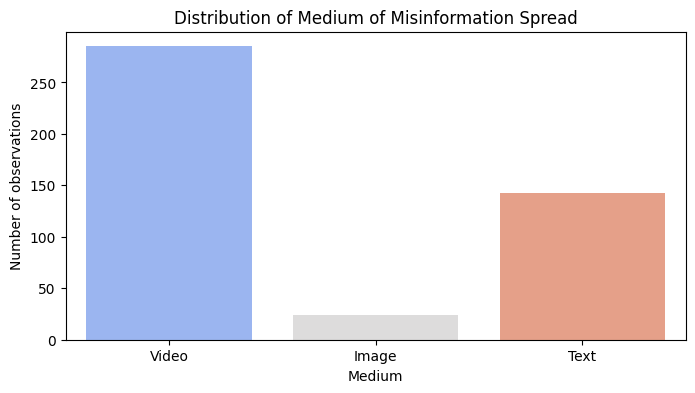

In [42]:
# extract the medium of misinformation spread like, if the claim contains video, image, text, etc.
# make counteers for each medium and plot the distribution
video = 0
image = 0
text = 0

for claim in data_2024['Claim']:
    if pd.notnull(claim):
        if 'video' in claim.split():
            video += 1
        elif 'image' in claim.split():
            image += 1
        else:
            text += 1
    
# plot the distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=['Video', 'Image', 'Text'], y=[video, image, text], palette='coolwarm')
plt.title('Distribution of Medium of Misinformation Spread')
plt.xlabel('Medium')
plt.ylabel('Number of observations')
plt.show()

C:\Users\prita\AppData\Local\Temp\ipykernel_5388\1410339109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fact_check_summary', data=data_2024, palette='coolwarm')


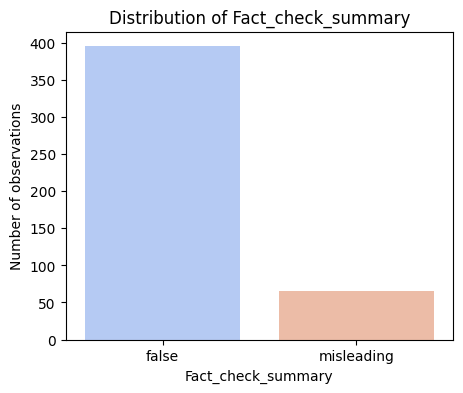

In [43]:
# histogram of the Fact_check_summary column using seaborn
plt.figure(figsize=(5, 4))
sns.countplot(x='Fact_check_summary', data=data_2024, palette='coolwarm')
plt.title('Distribution of Fact_check_summary')
plt.xlabel('Fact_check_summary')
plt.ylabel('Number of observations')
plt.show()

In [44]:
# take Claim column
claims = data_2024['Claim']

In [45]:
# shape of the data
claims.shape

(460,)

In [46]:
# count of NaN values in the Claim column
claims.isnull().sum()

8

In [47]:
# drop NaN values
claims = claims.dropna()

In [48]:
# Preprocess data to create transactions of words
# Tokenize the claims into individual words or themes
transactions = claims.apply(lambda x: x.lower().split()).tolist()

In [49]:
transactions[:5]

[['video',
  'shows',
  'an',
  'american',
  'woman',
  'being',
  'heckled',
  'in',
  'bangladesh',
  'for',
  'not',
  'wearing',
  'a',
  'hijab.'],
 ['an',
  'image',
  'showing',
  'a',
  'beef',
  'biryani',
  'spice',
  'mix',
  'with',
  'patanjali',
  'branding',
  'is',
  'circulating',
  'online',
  'with',
  'a',
  'false',
  'claim',
  'that',
  'the',
  'indian',
  'company,',
  'known',
  'for',
  'promoting',
  'traditional',
  'values,',
  'is',
  'manufacturing',
  'and',
  'selling',
  'the',
  'product.',
  'the',
  'image',
  'includes',
  'the',
  'words',
  '“beef',
  'biryani”',
  'and',
  'patanjali',
  'logos,',
  'leading',
  'to',
  'social',
  'media',
  'outrage',
  'and',
  'accusations',
  'of',
  'hypocrisy',
  'against',
  'the',
  'brand.'],
 ['video',
  'shows',
  'a',
  'hindu',
  'man',
  'killed',
  'by',
  'slitting',
  'his',
  'throat',
  'in',
  'front',
  'of',
  'everyone',
  'at',
  'the',
  'eidgah',
  'gate',
  'of',
  'kauria',
  'para

In [50]:
# remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Custom stopwords specific to misinformation data
custom_stopwords = {'claim', 'false', 'video', 'social', 'image', 'media', 'online', 'showing', 'shows', 'viral'}
all_stopwords = stop_words.union(custom_stopwords)

# Sample data
claims = claims.apply(lambda x: " ".join([word for word in x.lower().split() if word not in all_stopwords]))

# Tokenize processed data
transactions = claims.apply(lambda x: x.split()).tolist()

transactions[:3]

[['american', 'woman', 'heckled', 'bangladesh', 'wearing', 'hijab.'],
 ['beef',
  'biryani',
  'spice',
  'mix',
  'patanjali',
  'branding',
  'circulating',
  'indian',
  'company,',
  'known',
  'promoting',
  'traditional',
  'values,',
  'manufacturing',
  'selling',
  'product.',
  'includes',
  'words',
  '“beef',
  'biryani”',
  'patanjali',
  'logos,',
  'leading',
  'outrage',
  'accusations',
  'hypocrisy',
  'brand.'],
 ['hindu',
  'man',
  'killed',
  'slitting',
  'throat',
  'front',
  'everyone',
  'eidgah',
  'gate',
  'kauria',
  'para',
  'narsingdi',
  'district',
  'bangladesh']]

In [52]:
# Transaction encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transformed_df = pd.DataFrame(te_ary, columns=te.columns_)
transformed_df.head()

,"""'i","""100","""advice","""aid","""an","""azadi","""badla","""beacon","""beef","""booth",...,ಹಿಂದೂಗಳು,ಹೋಗುತ್ತೆ,“beef,“election,“reaction,“revenge,“robbed,“urban,₹100,₹18.
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transformed_df, min_support=0.05, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support                           itemsets
0   0.061947                            ((bjp))
1   0.099558                        (bharatiya)
2   0.075221                            (chief)
3   0.090708                      (circulating)
4   0.130531                         (claiming)
..       ...                                ...
74  0.077434            (prime, minister, modi)
75  0.097345        (prime, narendra, minister)
76  0.079646            (prime, narendra, modi)
77  0.055310  ((bjp), janata, party, bharatiya)
78  0.077434  (prime, narendra, minister, modi)

[79 rows x 2 columns]


In [54]:
# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
print("Association Rules:")
print(rules)

Association Rules:
          antecedents                  consequents  antecedent support  \
0             ((bjp))                  (bharatiya)            0.061947   
1         (bharatiya)                      ((bjp))            0.099558   
2             ((bjp))                     (janata)            0.061947   
3            (janata)                      ((bjp))            0.106195   
4             ((bjp))                      (party)            0.061947   
..                ...                          ...                 ...   
129  (minister, modi)            (prime, narendra)            0.077434   
130           (prime)   (narendra, minister, modi)            0.128319   
131        (narendra)      (prime, minister, modi)            0.103982   
132        (minister)      (prime, narendra, modi)            0.188053   
133            (modi)  (prime, narendra, minister)            0.090708   

     consequent support   support  confidence       lift  leverage  \
0              0.09955

### Lets work on August Data as two major events happended during that period
- Sheikh Hasina resigned as Bangladesh's prime minister and fled the country, creating lots of misinformation regarding Hindu minorities living in Bangladesh
- RG Kar Medical College rape-murder case in Kolkata, India

In [55]:
# extarct August 2024 data
data_aug_2024 = data_2024[data_2024['Month'] == 8]

data_aug_2024.head()

,Category,Link,Heading,Sub_heading,Author,Date,Claim,Fact_check,Claim_summary,Claimed_by,Fact_check_summary,Links,Year,Month
48,fact check,https://www.boomlive.in/fact-check/fake-news-c...,video of children vandalising rail tracks in p...,boom found that the viral video is from karach...,Rohit Kumar |,2024-08-31 13:30:00,a viral video purportedly shows three muslim c...,boom found that the viral video is not from in...,a viral video purportedly shows three muslim c...,social media posts,false,['https://x.com/ByRakeshSimha/status/182917672...,2024,8
49,politics,https://www.boomlive.in/fact-check/politics/fa...,old video from kerala viral as pre poll rss ma...,"boom found that the viral video is from tanur,...",Anmol Alphonso |,2024-08-30 17:36:00,video shows rss march in haryana before 2024 a...,we found that the viral video dates back to oc...,video shows rss march in haryana before 2024 a...,social media posts,false,['https://timesofindia.indiatimes.com/city/cha...,2024,8
50,fact check,https://www.boomlive.in/fact-check/fact-check-...,claim of nationwide “free travel scheme” for w...,the only pan-india women’s helpline numbers ar...,Nidhi Jacob |,2024-08-30 15:27:00,a viral social media post and whatsapp forward...,this is misleading. the only pan-india women’s...,viral posts are claiming that there is a natio...,"x posts, whatsapp forwards",misleading,"['https://t.co/rMuilw4pTu', 'https://twitter.c...",2024,8
51,fact check,https://www.boomlive.in/fact-check/no-this-is-...,"no, this is not rape accused sanjay roy cuttin...",a representative for cnmch confirmed to boom t...,Archis Chowdhury |,2024-08-30 14:45:00,an image showing an individual cutting a cake ...,NaN,image shows rg kar rape accused sanjoy roy wit...,"x users, times now bangla, zee news, republic",false,"['https://perma.cc/84T5-5W9W', 'https://archiv...",2024,8
52,fact check,https://www.boomlive.in/fact-check/fake-news-h...,haryana bjp posts cropped clip claiming hooda ...,boom found that congress mp deepender hooda in...,Anmol Alphonso |,2024-08-28 16:19:00,video posted by bjp haryana's official handle ...,boom found that the viral video is edited; in ...,video posted by bjp haryana's official handle ...,"bjp haryana, social media posts",false,['https://www.aninews.in/news/national/general...,2024,8


C:\Users\prita\AppData\Local\Temp\ipykernel_5388\2737408217.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Video', 'Image', 'Text'], y=[video, image, text], palette='coolwarm')


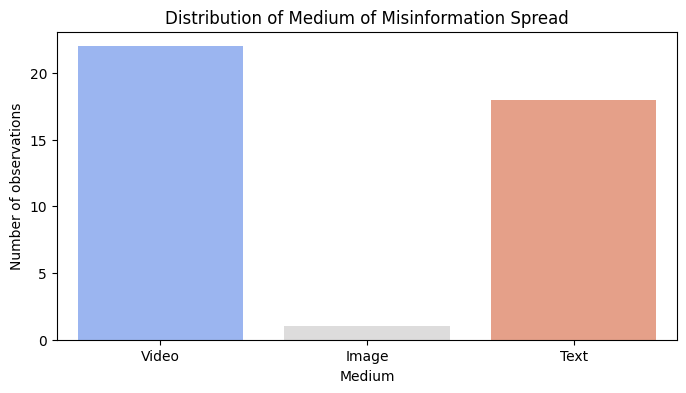

In [56]:
# extract the medium of misinformation spread like, if the claim contains video, image, text, etc.
# make counteers for each medium and plot the distribution
video = 0
image = 0
text = 0

for claim in data_aug_2024['Claim']:
    if pd.notnull(claim):
        if 'video' in claim.split():
            video += 1
        elif 'image' in claim.split():
            image += 1
        else:
            text += 1
    
# plot the distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=['Video', 'Image', 'Text'], y=[video, image, text], palette='coolwarm')
plt.title('Distribution of Medium of Misinformation Spread')
plt.xlabel('Medium')
plt.ylabel('Number of observations')
plt.show()

C:\Users\prita\AppData\Local\Temp\ipykernel_5388\2682566567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fact_check_summary', data=data_aug_2024, palette='coolwarm')


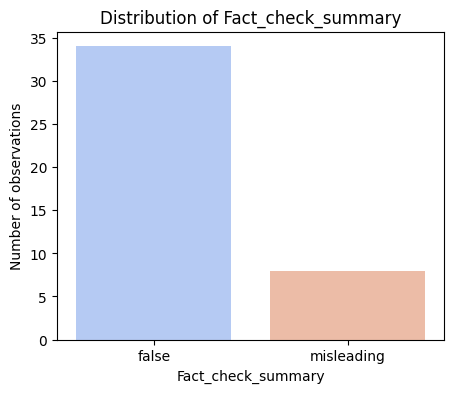

In [57]:
# histogram of the Fact_check_summary column using seaborn
plt.figure(figsize=(5, 4))
sns.countplot(x='Fact_check_summary', data=data_aug_2024, palette='coolwarm')
plt.title('Distribution of Fact_check_summary')
plt.xlabel('Fact_check_summary')
plt.ylabel('Number of observations')
plt.show()

C:\Users\prita\AppData\Local\Temp\ipykernel_5388\2828841705.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Communal/Religion', 'International', 'Political', 'RG_Kar_Rape'], y=[communal, international, political, RG_Kar_Rape], palette='coolwarm')


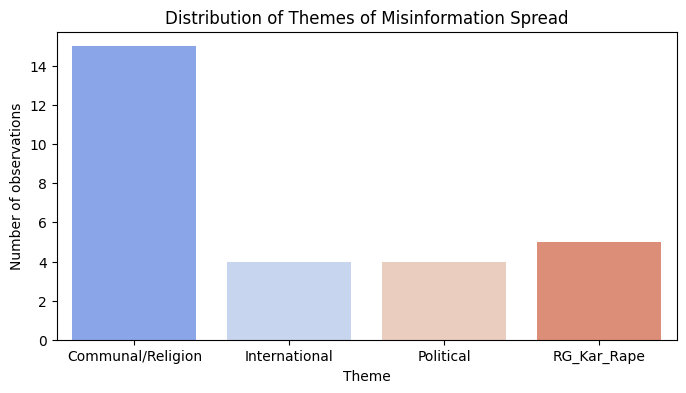

In [58]:
# Themes/Topics of misinformation spread
# if the claim contains any of the following words, then it belongs to that theme
# communal/Religion - muslim, islam, mosque, hindu, temple, church, religion, communal
# International - bangladesh, china, pakistan, sheikh, hasina
# Political - party, leader, election
# Kolkat Rape - kolkata, RG, Kar, rape

# extract the themes
communal = 0
international = 0
political = 0
RG_Kar_Rape = 0

for claim in data_aug_2024['Claim']:
    if pd.notnull(claim):
        if any(word in claim.split() for word in ['muslim', 'islam', 'mosque', 'hindu', 'temple', 'church', 'religion', 'communal']):
            communal += 1
        elif any(word in claim.split() for word in ['bangladesh', 'china', 'pakistan', 'sheikh', 'hasina']):
            international += 1
        elif any(word in claim.split() for word in ['party', 'leader', 'election']):
            political += 1
        elif any(word in claim.split() for word in ['kolkata', 'rg', 'kar', 'rape']):
            RG_Kar_Rape += 1

# plot the distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=['Communal/Religion', 'International', 'Political', 'RG_Kar_Rape'], y=[communal, international, political, RG_Kar_Rape], palette='coolwarm')
plt.title('Distribution of Themes of Misinformation Spread')
plt.xlabel('Theme')
plt.ylabel('Number of observations')
plt.show()

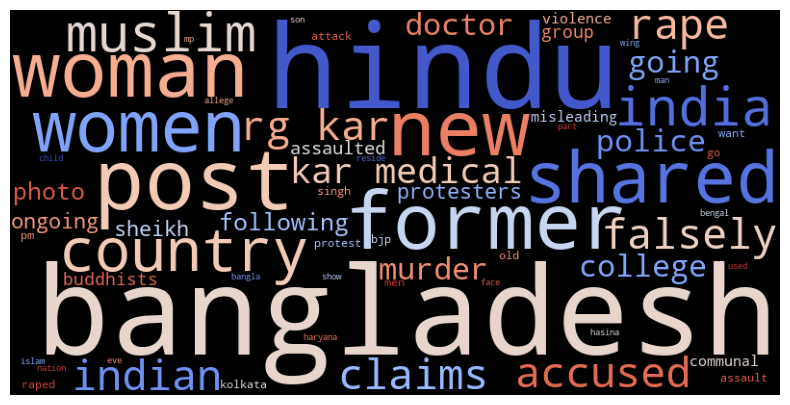

In [59]:
# create a word cloud of the claims
from wordcloud import WordCloud

# join all the claims
text = ' '.join(data_aug_2024['Claim'].dropna())

# remove stopwords, custom stopwords, and punctuations and words with frequency less than 5
text = ' '.join([word for word in text.lower().split() if word not in all_stopwords and text.count(word) >= 3])

# create the word cloud
wordcloud = WordCloud(
    background_color="black",  # No background color for transparency
    mode="RGBA",            # Use RGBA mode for transparency
    colormap="coolwarm",      # Color scheme similar to your example
    width=800,              # Adjust width and height as needed
    height=400,
    random_state=42,        # For reproducibility
    prefer_horizontal=1.0   # To give more horizontal alignment of words
).generate(text)

# plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [67]:
# apriori algorithm to find frequent itemsets on August 2024 data
# Tokenize the claims into individual words or themes

# remove nan values
claims_aug = data_aug_2024['Claim'].dropna()
transactions = claims_aug.apply(lambda x: x.lower().split()).tolist()

# remove stopwords
transactions = [' '.join([word for word in claim if word not in all_stopwords]) for claim in transactions]

# Tokenize processed data
transactions = [claim.split() for claim in transactions]

# Transaction encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transformed_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transformed_df, min_support=0.05, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("Association Rules:")
print(rules)


Frequent Itemsets:
     support                     itemsets
0   0.073171                    (accused)
1   0.073171                  (assaulted)
2   0.170732                 (bangladesh)
3   0.073171               (bangladesh's)
4   0.097561                (bangladesh.)
..       ...                          ...
57  0.097561           (rg, medical, kar)
58  0.073171              (rape, rg, kar)
59  0.073171          (rape, rg, medical)
60  0.073171  (rg, college, medical, kar)
61  0.073171     (rape, rg, medical, kar)

[62 rows x 2 columns]
Association Rules:
       antecedents           consequents  antecedent support  \
0      (assaulted)               (hindu)            0.073171   
1     (bangladesh)              (hindus)            0.170732   
2         (hindus)          (bangladesh)            0.097561   
3   (bangladesh's)               (hindu)            0.073171   
4    (bangladesh.)               (hindu)            0.097561   
..             ...                   ...           

In [68]:
# sort the frequent itemsets by number of items and support
freq_itemsets = frequent_itemsets.copy()
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x: len(x))
freq_itemsets = freq_itemsets.sort_values(by=['length', 'support'], ascending=False)
print("Sorted Frequent Itemsets:")
print(freq_itemsets)

Sorted Frequent Itemsets:
     support                     itemsets  length
60  0.073171  (rg, college, medical, kar)       4
61  0.073171     (rape, rg, medical, kar)       4
57  0.097561           (rg, medical, kar)       3
53  0.073171      (college, medical, kar)       3
54  0.073171           (rg, college, kar)       3
..       ...                          ...     ...
29  0.073171                      (posts)       1
30  0.073171                 (protesters)       1
34  0.073171                     (sheikh)       1
35  0.073171                   (violence)       1
37  0.073171                      (women)       1

[62 rows x 3 columns]


In [69]:
# value counts of the length of the itemsets
freq_itemsets['length'].value_counts()

length
1    38
2    15
3     7
4     2
Name: count, dtype: int64

In [70]:
# top 5 frequent itemsets of each length
for i in range(1, 6):
    print(f"Top 5 frequent itemsets of length {i}:")
    print(freq_itemsets[freq_itemsets['length'] == i].head())
    print("\n")

Top 5 frequent itemsets of length 1:
     support       itemsets  length
15  0.243902        (hindu)       1
2   0.170732   (bangladesh)       1
12  0.121951       (former)       1
36  0.121951        (woman)       1
4   0.097561  (bangladesh.)       1


Top 5 frequent itemsets of length 2:
     support              itemsets  length
39  0.097561  (bangladesh, hindus)       2
45  0.097561        (hindu, woman)       2
46  0.097561        (medical, kar)       2
48  0.097561             (rg, kar)       2
50  0.097561         (rg, medical)       2


Top 5 frequent itemsets of length 3:
     support                 itemsets  length
57  0.097561       (rg, medical, kar)       3
53  0.073171  (college, medical, kar)       3
54  0.073171       (rg, college, kar)       3
55  0.073171   (rg, college, medical)       3
56  0.073171     (rape, medical, kar)       3


Top 5 frequent itemsets of length 4:
     support                     itemsets  length
60  0.073171  (rg, college, medical, kar)     

In [71]:
# sort the association rules by confidence and lift
rules.sort_values(by=['confidence', 'lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(college),(kar),0.073171,0.097561,0.073171,1.000000,10.250000,0.066032,inf,0.973684
7,(college),(medical),0.073171,0.097561,0.073171,1.000000,10.250000,0.066032,inf,0.973684
10,(college),(rg),0.073171,0.097561,0.073171,1.000000,10.250000,0.066032,inf,0.973684
12,(medical),(kar),0.097561,0.097561,0.097561,1.000000,10.250000,0.088043,inf,1.000000
13,(kar),(medical),0.097561,0.097561,0.097561,1.000000,10.250000,0.088043,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
65,(rape),"(rg, medical)",0.097561,0.097561,0.073171,0.750000,7.687500,0.063653,3.609756,0.963964
85,"(rg, medical, kar)",(rape),0.097561,0.097561,0.073171,0.750000,7.687500,0.063653,3.609756,0.963964
92,(rape),"(rg, medical, kar)",0.097561,0.097561,0.073171,0.750000,7.687500,0.063653,3.609756,0.963964
4,(bangladesh.),(hindu),0.097561,0.243902,0.073171,0.750000,3.075000,0.049375,3.024390,0.747748


In [72]:
# execute priori algorithm for minimum support of 3% to 10%
# store the results in a list
freq_items = []
asso_rules = []
support = [0.03, 0.05, 0.07, 0.10]
for i in support:
    frequent_itemsets = apriori(transformed_df, min_support=i, use_colnames=True)
    freq_items.append(frequent_itemsets)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
    asso_rules.append(rules)

In [73]:
freq_items

[      support                                           itemsets
 0    0.073171                                          (accused)
 1    0.048780                                        (allegedly)
 2    0.048780                                          (article)
 3    0.048780                                          (assault)
 4    0.073171                                        (assaulted)
 ..        ...                                                ...
 470  0.048780           (rape, medical, several, posts, rg, kar)
 471  0.048780            (rape, murder, several, posts, rg, kar)
 472  0.048780        (rape, murder, medical, several, posts, rg)
 473  0.048780  (college, medical, hospital, falsely, doctor, ...
 474  0.048780   (rape, murder, medical, several, posts, rg, kar)
 
 [475 rows x 2 columns],
      support                     itemsets
 0   0.073171                    (accused)
 1   0.073171                  (assaulted)
 2   0.170732                 (bangladesh)
 3   0.07

In [74]:
asso_rules

[         antecedents                              consequents  \
 0        (assaulted)                                  (hindu)   
 1           (hindus)                             (bangladesh)   
 2           (media.)                             (bangladesh)   
 3     (bangladesh's)                                  (hindu)   
 4         (surfaced)                           (bangladesh's)   
 ...              ...                                      ...   
 3229   (rg, several)      (rape, medical, murder, posts, kar)   
 3230  (several, kar)       (rape, medical, murder, posts, rg)   
 3231     (rg, posts)    (rape, medical, murder, several, kar)   
 3232    (kar, posts)     (rape, medical, murder, several, rg)   
 3233       (several)  (rape, medical, murder, posts, rg, kar)   
 
       antecedent support  consequent support   support  confidence       lift  \
 0               0.073171            0.243902  0.073171         1.0   4.100000   
 1               0.097561            0.170

### **Implement FPGrowth Algorithm in Pyspark**

The FP-Growth (Frequent Pattern Growth) algorithm is an efficient way to mine frequent itemsets without generating candidate sets, unlike the Apriori algorithm. It is particularly useful for datasets where frequent itemsets are sparse, and it scales well with large datasets.

**Key Concepts in FP-Growth**
- Tree Compression: By grouping shared prefixes in the tree, FP-Growth significantly reduces the number of nodes, making it memory-efficient and faster than Apriori.
- Recursive Pattern Growth: Instead of generating and testing candidate itemsets, FP-Growth recursively builds patterns, reducing computational overhead.

Applying the FP-Growth algorithm to misinformation data is a useful way to uncover frequent patterns in claims and themes within the dataset.

In [80]:
from pyspark.ml.fpm import FPGrowth
from pyspark.sql import functions as F

In [77]:
# create a spark session
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("frequent_itemsets") \
        .getOrCreate()

In [78]:
# create a spark dataframe from the transactions
df = spark.createDataFrame([(i, x) for i, x in enumerate(transactions)], ["id", "items"])
df.show()

+---+--------------------+
| id|               items|
+---+--------------------+
|  0|[purportedly, thr...|
|  1|[rss, march, hary...|
|  2|[post, whatsapp, ...|
|  3|[individual, cutt...|
|  4|[posted, bjp, har...|
|  5|[17-second, graph...|
|  6|[former, reserve,...|
|  7|[badlapur, sexual...|
|  8|[whatsapp, forwar...|
|  9|[post, claiming, ...|
| 10|[virat, kohli, st...|
| 11|[makeup, artist,,...|
| 12|[several, posts, ...|
| 13|[post, claims, pr...|
| 14|[several, posts, ...|
| 15|[photo, uddhav, t...|
| 16|[news, agency, as...|
| 17|[clash, banglades...|
| 18|[building, hindus...|
| 19|[india, bought, 2...|
+---+--------------------+
only showing top 20 rows



In [81]:
# remove duplicates from each items
df = df.withColumn("unique_items", F.expr("array_distinct(items)"))
df.show()

+---+--------------------+--------------------+
| id|               items|        unique_items|
+---+--------------------+--------------------+
|  0|[purportedly, thr...|[purportedly, thr...|
|  1|[rss, march, hary...|[rss, march, hary...|
|  2|[post, whatsapp, ...|[post, whatsapp, ...|
|  3|[individual, cutt...|[individual, cutt...|
|  4|[posted, bjp, har...|[posted, bjp, har...|
|  5|[17-second, graph...|[17-second, graph...|
|  6|[former, reserve,...|[former, reserve,...|
|  7|[badlapur, sexual...|[badlapur, sexual...|
|  8|[whatsapp, forwar...|[whatsapp, forwar...|
|  9|[post, claiming, ...|[post, claiming, ...|
| 10|[virat, kohli, st...|[virat, kohli, st...|
| 11|[makeup, artist,,...|[makeup, artist,,...|
| 12|[several, posts, ...|[several, posts, ...|
| 13|[post, claims, pr...|[post, claims, pr...|
| 14|[several, posts, ...|[several, posts, ...|
| 15|[photo, uddhav, t...|[photo, uddhav, t...|
| 16|[news, agency, as...|[news, agency, as...|
| 17|[clash, banglades...|[clash, bangla

In [82]:
# create the FPGrowth model
fpGrowth = FPGrowth(itemsCol="unique_items", minSupport=0.05, minConfidence=0.7)
model = fpGrowth.fit(df)

In [83]:
# Display frequent itemsets
print("Frequent Itemsets:")
model.freqItemsets.show()

Frequent Itemsets:
+--------------------+----+
|               items|freq|
+--------------------+----+
|            [murder]|   3|
|      [murder, rape]|   3|
|               [kar]|   4|
|      [kar, medical]|   4|
|            [indian]|   4|
|          [violence]|   3|
|             [hindu]|  10|
|              [post]|   3|
|             [posts]|   3|
|        [bangladesh]|   7|
|              [rape]|   4|
|         [rape, kar]|   3|
|[rape, kar, medical]|   3|
|     [rape, medical]|   3|
|        [misleading]|   3|
|         [assaulted]|   3|
|  [assaulted, hindu]|   3|
|            [former]|   5|
|           [college]|   3|
|      [college, kar]|   3|
+--------------------+----+
only showing top 20 rows



In [84]:
# Display generated association rules.
model.associationRules.show()

+--------------------+----------+----------+------------------+-------------------+
|          antecedent|consequent|confidence|              lift|            support|
+--------------------+----------+----------+------------------+-------------------+
| [rg, rape, medical]|     [kar]|       1.0|             10.25|0.07317073170731707|
|     [rape, medical]|     [kar]|       1.0|             10.25|0.07317073170731707|
|     [rape, medical]|      [rg]|       1.0|             10.25|0.07317073170731707|
|           [rg, kar]| [college]|      0.75|             10.25|0.07317073170731707|
|           [rg, kar]| [medical]|       1.0|             10.25| 0.0975609756097561|
|           [rg, kar]|    [rape]|      0.75|            7.6875|0.07317073170731707|
|      [bangladesh's]|   [hindu]|       1.0|4.1000000000000005|0.07317073170731707|
|              [rape]|  [murder]|      0.75|             10.25|0.07317073170731707|
|              [rape]|     [kar]|      0.75|            7.6875|0.07317073170

In [86]:
# give sorted association rules by confidence and lift top 10 and bottom 10
model.associationRules.orderBy("confidence", "lift", ascending=False).show(10)

model.associationRules.orderBy("confidence", "lift", ascending=True).show(10)

+--------------------+----------+----------+-----+-------------------+
|          antecedent|consequent|confidence| lift|            support|
+--------------------+----------+----------+-----+-------------------+
|[rape, kar, medical]|      [rg]|       1.0|10.25|0.07317073170731707|
|  [college, medical]|     [kar]|       1.0|10.25|0.07317073170731707|
|            [murder]|    [rape]|       1.0|10.25|0.07317073170731707|
|  [college, medical]|      [rg]|       1.0|10.25|0.07317073170731707|
|           [college]|     [kar]|       1.0|10.25|0.07317073170731707|
|  [college, rg, kar]| [medical]|       1.0|10.25|0.07317073170731707|
|               [kar]| [medical]|       1.0|10.25| 0.0975609756097561|
|           [medical]|     [kar]|       1.0|10.25| 0.0975609756097561|
|           [college]|      [rg]|       1.0|10.25|0.07317073170731707|
|           [medical]|      [rg]|       1.0|10.25| 0.0975609756097561|
+--------------------+----------+----------+-----+-------------------+
only s

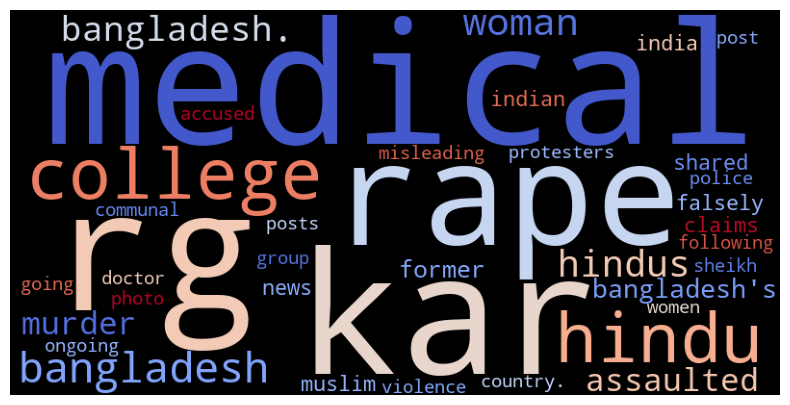

In [85]:
# create a wordcloud to visualize for thematic insights
# create a dataframe of the frequent itemsets
# use the results from FP Growth algorithm


frequent_itemsets = model.freqItemsets

# Convert the frequent itemsets to a Pandas DataFrame
frequent_itemsets_df = frequent_itemsets.toPandas()

# Prepare data for the word cloud
# Create a dictionary where keys are item names and values are their frequencies
wordcloud_data = {}

for _, row in frequent_itemsets_df.iterrows():
    items = row['items']
    frequency = row['freq']
    for item in items:
        # Increment frequency for each individual item in the itemset
        if item in wordcloud_data:
            wordcloud_data[item] += frequency
        else:
            wordcloud_data[item] = frequency

# Create the word cloud
wordcloud = WordCloud(
    background_color="black",  # No background color for transparency
    mode="RGBA",            # Use RGBA mode for transparency
    colormap="coolwarm",      # Color scheme similar to your example
    width=800,              # Adjust width and height as needed
    height=400,
    random_state=42,        # For reproducibility
    prefer_horizontal=1.0   # To give more horizontal alignment of words
).generate_from_frequencies(wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


**Interpretation**

For all thresholds, certain terms like “hindu,” “bangladesh,” and “medical” appear frequently as both antecedents and consequents. This indicates that these terms form a common pattern within the dataset, likely pointing to recurring misinformation themes involving Hindu or Bangladeshi or RG Kar Medical college contexts.

Many rules have a confidence of 1.0, indicating that whenever the antecedent appears, the consequent always follows. High-confidence rules suggest strong co-occurrence, meaning that claims involving these antecedents reliably relate to the consequents, showing a direct connection in misinformation themes.

With context of two major events in August, the frequent itemsets and association rules become more insightful.
Example -
- (assaulted) → (hindu): This rule, with a confidence of 1.0 and a lift of 4.1, indicates that misinformation involving the word "assaulted" is almost always associated with the term "Hindu." This could reflect narratives linking the perceived vulnerability or targeting of Hindu minorities in Bangladesh following the political upheaval, possibly creating or amplifying fears among communities about safety and communal tensions.
- (bangladesh's) → (hindu): Similarly, this rule highlights how misinformation related to Bangladesh frequently pairs with themes surrounding the Hindu minority. This pattern likely reflects narratives painting Hindus in Bangladesh as at risk.
- (college) → (kar): This rule could relate to the RG Kar Medical College incident, where misinformation may have used terms like "college" and "Kar" frequently together to sensationalize or spread misleading details about the rape-murder case.

Major Themes -
-  Itemsets like {hindu, bangladesh} or {hindus, bangladesh} show that a significant theme in the misinformation claims centers on communal tensions and the Hindu minority in Bangladesh.
- The itemset {rape, medical, murder, college, kar} connects terms that likely sensationalize the RG Kar Medical College case.